# Introduction to Machine Learning
# Take-home Assignment 1

In [ ]:
# Install necessary packages
!pip install mlxtend
!pip install imblearn

In [10]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE


## Part A - Classification with Numerical Data

In [11]:
# Define a function that prints the Accuracy, F1-score, and confusion matrix of a model, and then saves them for the final csv file
datalist = []
def evaluation_metrics(model, data, best_param, X_train, y_train, X_test, y_test):
    # Calculate the prediction
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Evaluate the accuracy on train and test set
    print(f"Training set accuracy: {model.score(X_train, y_train):.3}")
    print(f"Test set accuracy: {model.score(X_test, y_test):.3}\n")

    # Evaluate the weighted F1-score on train and test set
    print(f"Training set weighted F1-score: {f1_score(y_train, pred_train,average='micro'):.3}")
    print(f"Test set weighted F1-score: {f1_score(y_test, pred_test,average='micro'):.3}\n")

    # Evaluate the confusion matrix on train and test set
    print(f"Training set confusion matrix:\n{confusion_matrix(y_train, pred_train)}")
    print(f"Test set confusion matrix:\n{confusion_matrix(y_test, pred_test)}")

    # Save Test set weighted F1-score and accuracy for final csv file
    x = [model, data, best_param, round(f1_score(y_test, pred_test,average='micro'),3), round(model.score(X_test, y_test),3)]
    datalist.append(x)
    

1. (5 points) Load the train and test dataset, spotify songs train.csv and spotify songs test.csv. Create a feature set without ‘label‘. (For train data, assign all numerical data except the column ‘label‘ to “X train”. For test data, assign all the data except the columns “label” to “X test”) Assign the ‘label” as a target variable. (For train data, assign the column “label” to “y train”. For test data, assign the column “label” to “y test”).

Points breakdown: 2 points for loading the dataset, 2 points for creating the feature sets (“X train” and “X test”) and 1 point for creating your target variable (“y train” and “y test”)

In [12]:
# Load the training data and set X_train_num and y_train_num
train_data = pd.read_csv('spotify_songs_train2.csv',encoding= 'unicode_escape') # [5]
X_train_num = train_data.drop(["label"], axis = 1).select_dtypes(include='number') # [6]
y_train_num = pd.DataFrame(train_data["label"])

# Load the test data and set X_test_num and y_test_num
test_data = pd.read_csv('spotify_songs_test2.csv',encoding= 'unicode_escape')
X_test_num = test_data.drop(["label"], axis = 1).select_dtypes(include='number')
y_test_num = pd.DataFrame(test_data["label"])

2. (5 points) Display a histogram plot of the target variable. Visualize each feature in “X train” in a separate histogram plot.
Points breakdown: 2 points for displaying a histogram plot of the target variable. 3 points for displaying the histogram plot of each feature in “X train”.

Points breakdown: 2 points for displaying a histogram plot of the target variable. 3 points for displaying the histogram plot of each feature in “X train”.

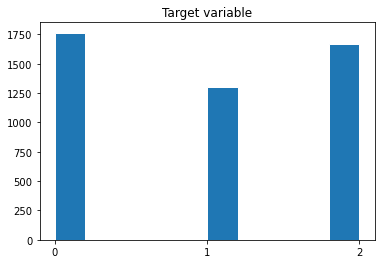

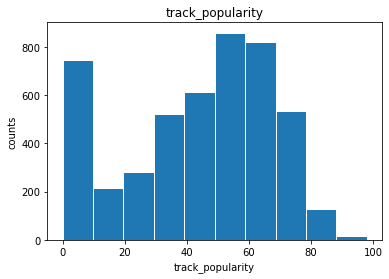

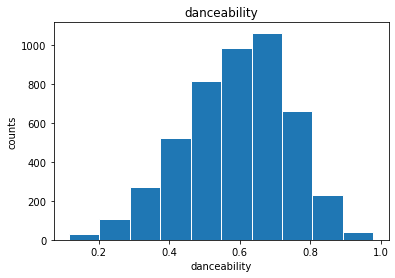

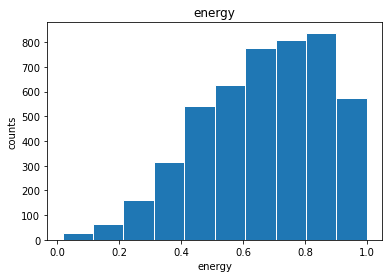

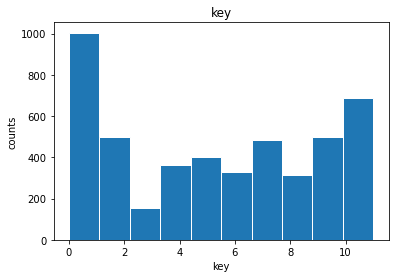

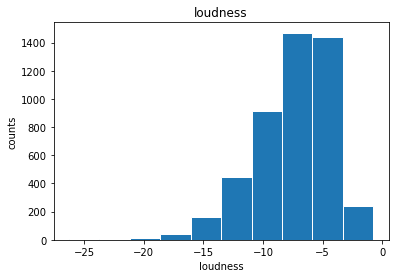

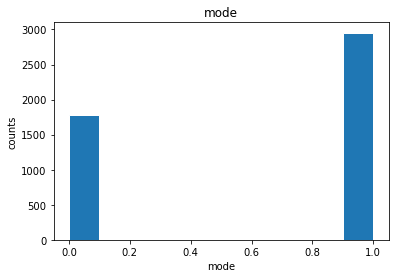

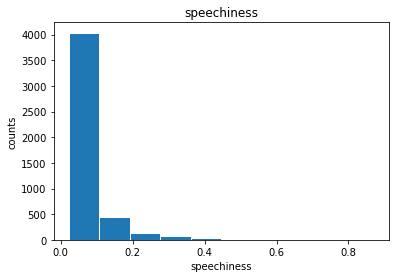

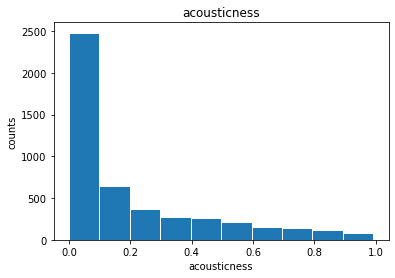

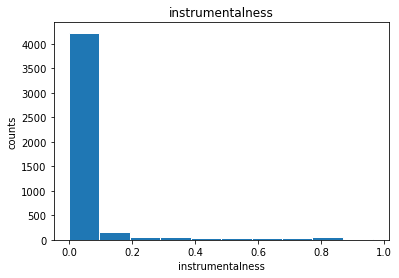

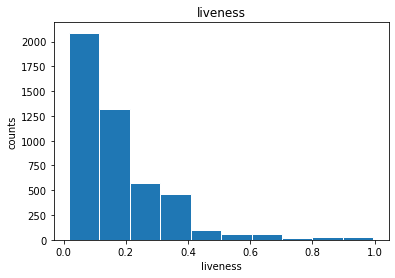

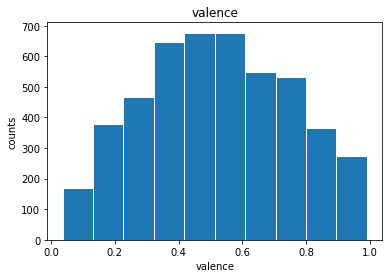

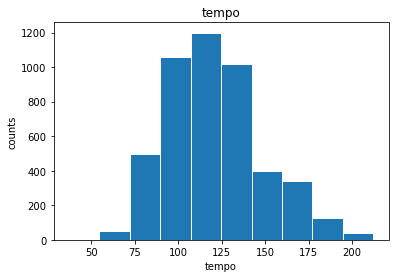

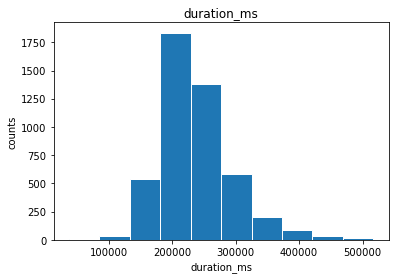

In [13]:
plt.figure()
# Turn y_train_num variables into strings for better visualisation
y_train_str = pd.DataFrame(y_train_num.copy()).applymap(str)

# Display histogram plot of target variable
plt.hist(y_train_str, edgecolor = "white")
plt.title("Target variable")

# Visualise each of the features in X_train in a separate histogram
for col in X_train_num.columns:
    plt.figure()
    plt.hist(X_train_num[f"{col}"], edgecolor = "white")
    plt.xlabel(f"{col}")
    plt.ylabel("counts")
    plt.title(f"{col}")

3. (5 points) Train a Dummy Classifier on the training data. Evaluate the accuracy, weighted F1-score and confusion matrix on the train and test set.

Points breakdown: 2 points for training a Dummy Classifier. 2 points for evaluation on the test set, 1 point for evaluation on the training set.


In [14]:
# Train a Dummy Classifier on the training data
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train_num, y_train_num)

# Evaluation metrics
evaluation_metrics(dummy_clf, "Numerical data", "N/A", X_train_num, y_train_num, X_test_num, y_test_num)


Training set accuracy: 0.335
Test set accuracy: 0.322

Training set weighted F1-score: 0.34
Test set weighted F1-score: 0.334

Training set confusion matrix:
[[598 597 570]
 [407 459 436]
 [559 556 550]]
Test set confusion matrix:
[[210 242 211]
 [110 122 104]
 [148 168 162]]


4. (10 points) Using GridSearchCV, train a Logistic Regression classifier with a 5-fold cross validation. Find the best regularization (C) hyperparameter with 5 different C values. Using the best hyperparameter found from grid search on the training set, evaluate the accuracy, weighted F1-score and confusion matrix on the train and test set.

Points breakdown: 4 points for evaluating a Logistic Regression classifier without Grid Search and Cross Validation. 3 points for GridSearchCV with the correct number of folds. 1 points for computing the accuracy and 1 point for confusion matrix and 1 point for weighted F1-score.

In [15]:
# Use grid search to find the best hyperparameter C with a 5-fold cross validation
y_train_num=np.ravel(y_train_num)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_num, y_train_num)
print(f"Best parameter: {grid_search.best_params_}")

# Train a Logistic Regression classifier with the best hyperparameter C
lr = LogisticRegression(C=grid_search.best_params_['C'],multi_class="auto")
lr.fit(X_train_num,y_train_num)

# Evaluation metrics
evaluation_metrics(lr, "Numerical data", grid_search.best_params_, X_train_num, y_train_num, X_test_num, y_test_num)

Best parameter: {'C': 0.01}
Training set accuracy: 0.43
Test set accuracy: 0.453

Training set weighted F1-score: 0.43
Test set weighted F1-score: 0.453

Training set confusion matrix:
[[1146   59  560]
 [ 475  173  654]
 [ 795  156  714]]
Test set confusion matrix:
[[407  20 236]
 [107  49 180]
 [211  54 213]]


5. (5 points) Scale the train and test features with a Standard Scaler.

Points breakdown: 3 points for scaling X train. 2 points for scaling X test.


In [16]:
# Set the StandardScalers
scaler_train = StandardScaler()
scaler_test = StandardScaler()

# Fit the scalars and transform the data
X_train_scaled = scaler_train.fit_transform(X_train_num)
X_test_scaled = scaler_test.fit_transform(X_test_num)

6. (5 points) Using the scaled data from Question A.5, train a Logistic Regression classifier with the hyperparameters found in Question A.4.

In [17]:
# Train a Logistic Regression classifier on the scaled data
lr_scaled = LogisticRegression(C=grid_search.best_params_['C'])
lr_scaled.fit(X_train_scaled,y_train_num)

# Evaluation metrics
evaluation_metrics(lr_scaled, "Scaled numerical data", grid_search.best_params_, X_train_scaled, y_train_num, X_test_scaled, y_test_num)


Training set accuracy: 0.62
Test set accuracy: 0.647

Training set weighted F1-score: 0.62
Test set weighted F1-score: 0.647

Training set confusion matrix:
[[1153  231  381]
 [ 359  719  224]
 [ 406  198 1061]]
Test set confusion matrix:
[[436  83 144]
 [ 78 198  60]
 [107  49 322]]


7. (15 points) Using GridSearchCV, Try with two other low-level classifiers (e.g. Decision Trees, SVM, Naive Bayes, MLP, KNN) of your choice with grid search and cross validation. Choose one or two hyperparameters (if any) to search for. Using the best hyperparameters found from grid search, evaluate the accuracy, weighted F1-score and confusion matrix on the training and test set.

Points breakdown: For each classifier: 3 points for training each classifier, 2 points for each Grid- SearchCV. 1.5 points for computing both the accuracy and weighted F1-score for each classifier. 1 point for each confusion matrix. Zero points are awarded if regression algorithms are used.

In [18]:
# KNN
# Use grid search to find the best hyperparameter n_neighbors with a 5-fold cross validation
param_grid_KNN = {'n_neighbors': [50, 75, 100, 125, 150]}
grid_search_KNN = GridSearchCV(KNeighborsClassifier(), param_grid_KNN, cv=5)
grid_search_KNN.fit(X_train_num, y_train_num)
print(f"KNN - Best performing number of neighbours: {grid_search_KNN.best_params_['n_neighbors']}")

# Train a K-Nearest Neighbors classifier using the best hyperparameter n_neighbors
KNN = KNeighborsClassifier(n_neighbors=grid_search_KNN.best_params_['n_neighbors'])
KNN.fit(X_train_num,y_train_num)

# Evaluation metrics
evaluation_metrics(KNN, "Numerical data", grid_search_KNN.best_params_, X_train_num, y_train_num, X_test_num, y_test_num)

# SVM
# Use grid search to find the best hyperparameter C with a 5-fold cross validation
param_grid_SVM = {'C': [0.1, 1, 10,25,50]}
grid_search_SVM = GridSearchCV(SVC(), param_grid_SVM, cv=5)
grid_search_SVM.fit(X_train_num, y_train_num)
print(f"SVM - Best performing C: {grid_search_SVM.best_params_['C']}")

# Train a Support Vector Machine classifier using the best hyperparameter C
SVM = SVC(C=grid_search_SVM.best_params_["C"])
SVM.fit(X_train_num,y_train_num)

# Evaluation metrics
evaluation_metrics(SVM, "Numerical data", grid_search_SVM.best_params_, X_train_num, y_train_num, X_test_num, y_test_num)


KNN - Best performing number of neighbours: 100
Training set accuracy: 0.46
Test set accuracy: 0.495

Training set weighted F1-score: 0.46
Test set weighted F1-score: 0.495

Training set confusion matrix:
[[1251  155  359]
 [ 566  272  464]
 [ 784  226  655]]
Test set confusion matrix:
[[472  72 119]
 [147  73 116]
 [208  84 186]]
SVM - Best performing C: 50
Training set accuracy: 0.449
Test set accuracy: 0.512

Training set weighted F1-score: 0.449
Test set weighted F1-score: 0.512

Training set confusion matrix:
[[1402    0  363]
 [ 696    0  606]
 [ 943    0  722]]
Test set confusion matrix:
[[533   0 130]
 [187   0 149]
 [255   0 223]]


8. (10 points) Try a Random Forest and Gradient Boosting classifier with GridSearchCV. Choose one hyperparameter to search for with a minimum of 5 different values. Evaluate the accuracy, weighted F1-score and confusion matrix on the training and test set.

Points breakdown: For each classifier: 2 points for each classifier, 2 points for GridSearchCV. 1 points for computing the evaluation metrics.

In [19]:
# Random Forest
# Use grid search to find the best hyperparameter n_estimators with a 5-fold cross validation
param_grid_RF_num = {'n_estimators': [100, 125, 150, 175,200]}
grid_search_RF_num = GridSearchCV(RandomForestClassifier(), param_grid_RF_num, cv=5)
grid_search_RF_num.fit(X_train_num, y_train_num)
print(f"Random Forest - Best performing number of estimators: {grid_search_RF_num.best_params_['n_estimators']}")

# Train a Random Forest classifier using the best hyperparameter n_estimators
RF = RandomForestClassifier(n_estimators=grid_search_RF_num.best_params_['n_estimators'])
RF.fit(X_train_num,y_train_num)

# Evaluation metrics and saving the F1-score
evaluation_metrics(RF, "Numerical data", grid_search_RF_num.best_params_, X_train_num, y_train_num, X_test_num, y_test_num)

# Gradient Boosting
# Use grid search to find the best hyperparameter n_estimators with a 5-fold cross validation
param_grid_GB = {'n_estimators': [25, 50, 100, 125, 150]}
grid_search_GB = GridSearchCV(GradientBoostingClassifier(), param_grid_GB, cv=5)
grid_search_GB.fit(X_train_num, y_train_num)
print(f"Gradient Boosting - Best performing number of estimators: {grid_search_GB.best_params_['n_estimators']}")

# Train a Gradient Boosting classifier using the best hyperparameter n_estimators
GB = GradientBoostingClassifier(n_estimators=grid_search_GB.best_params_['n_estimators'])
GB.fit(X_train_num,y_train_num)

# Evaluation metrics and saving the F1-score
evaluation_metrics(GB, "Numerical data", grid_search_GB.best_params_, X_train_num, y_train_num, X_test_num, y_test_num)


Random Forest - Best performing number of estimators: 200
Training set accuracy: 1.0
Test set accuracy: 0.699

Training set weighted F1-score: 1.0
Test set weighted F1-score: 0.699

Training set confusion matrix:
[[1765    0    0]
 [   0 1302    0]
 [   0    0 1665]]
Test set confusion matrix:
[[458  80 125]
 [ 68 228  40]
 [ 84  48 346]]
Gradient Boosting - Best performing number of estimators: 125
Training set accuracy: 0.778
Test set accuracy: 0.701

Training set weighted F1-score: 0.778
Test set weighted F1-score: 0.701

Training set confusion matrix:
[[1345  177  243]
 [ 203  981  118]
 [ 223   87 1355]]
Test set confusion matrix:
[[465  96 102]
 [ 65 221  50]
 [ 83  46 349]]


9. (10 points) Display the feature importance of Random Forests and Gradient Boosting classifiers in bar chart. Plot the coefficients for the Logistic Regression solution. Show only the solutions from the best hyper parameters found via GridSearchCV. Comment whether the same features are given similiar importance from the charts and plot.

Points breakdown: 5 points for display bar charts, 3 points for the coefficient plot, 2 point for your comments.


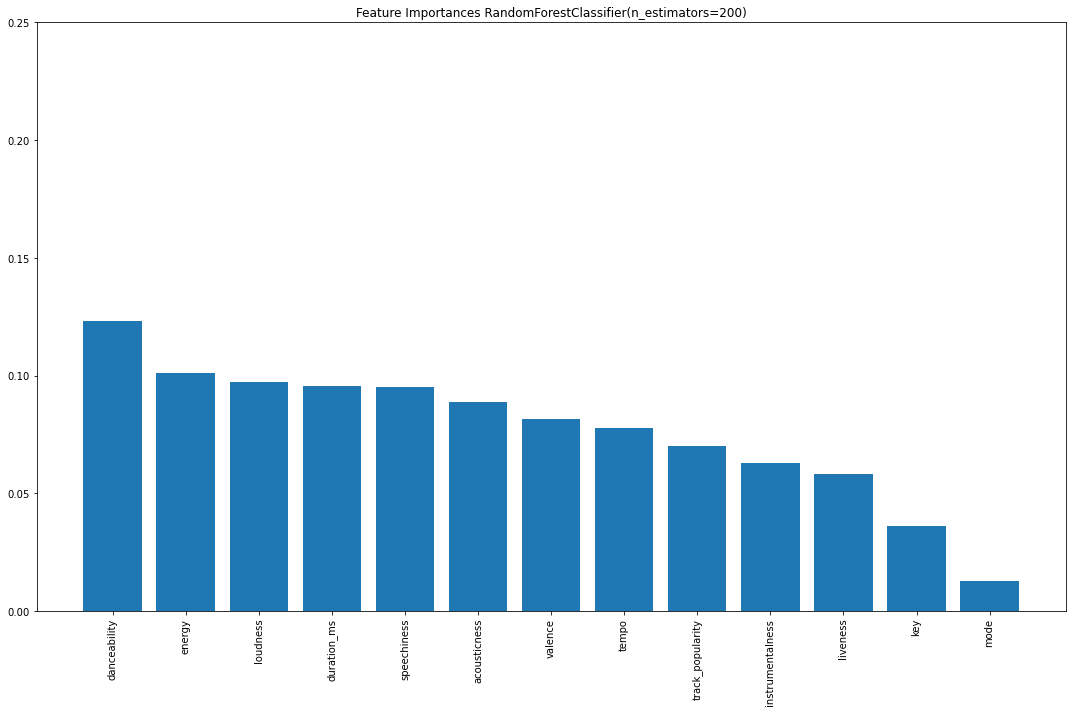

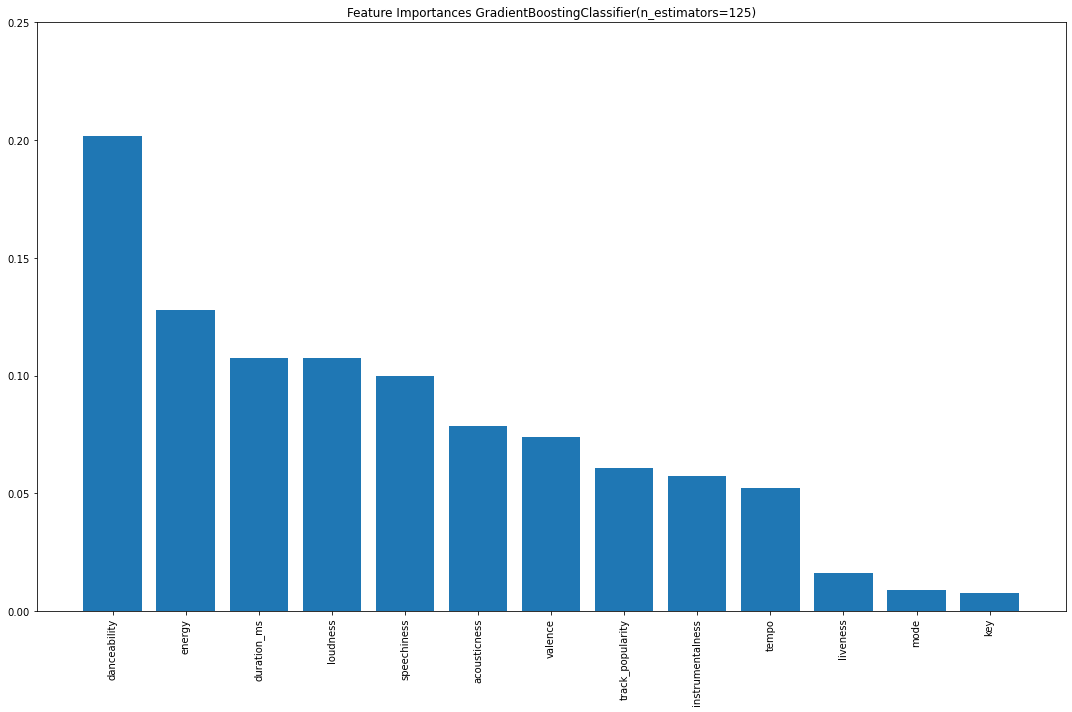

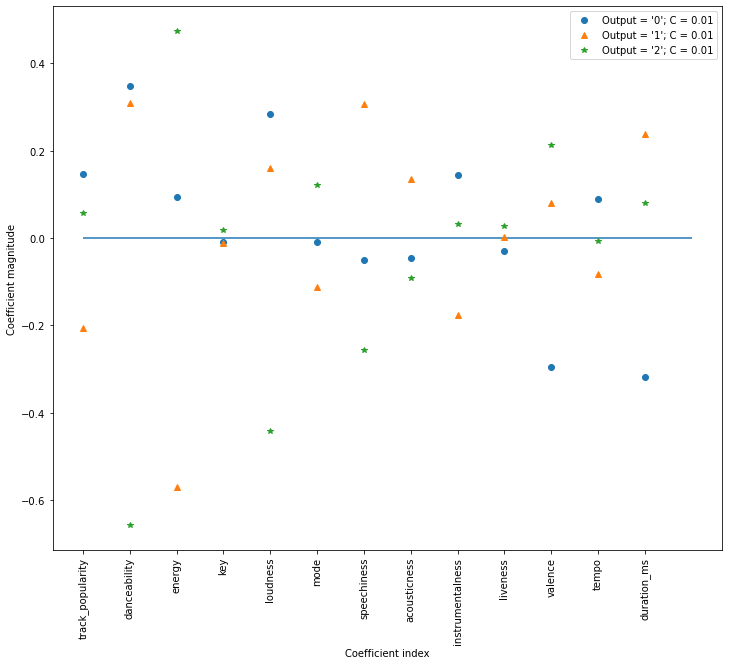

In [20]:
# Define a function that plots the feature importances for a model
def plot_feature_importances(model):
    sorted_indices = np.argsort(model.feature_importances_)[::-1]
    plt.figure(figsize=(15,10))
    plt.title(f'Feature Importances {model}')
    plt.bar(range(X_train_num.shape[1]), model.feature_importances_[sorted_indices], align='center')
    plt.xticks(range(X_train_num.shape[1]), X_train_num.columns[sorted_indices], rotation=90)
    plt.ylim(0,0.25)
    plt.tight_layout()
    plt.show()
    
# Plot the feature importances for the Random Forest classifier
plot_feature_importances(RF)

# Plot the feature importances for Gradient Boosting classifier
plot_feature_importances(GB)

# Turn y_train_num and y_test_num into dataframes
y_train_num_df = pd.DataFrame(y_train_num)
y_test_num_df = pd.DataFrame(y_test_num)

# Concatenate all training and test data into X and y
X = pd.concat([X_train_num, X_test_num])
y = pd.concat([y_train_num_df, y_test_num_df])

# Plot the coefficients for the Logistic Regression solution
plt.figure(figsize=(12,10))
for i,marker in zip(range(len(lr_scaled.coef_)),["o","^","*"]):
    plt.plot(lr_scaled.coef_[i], marker,label=f"Output = '{i}'; C = {grid_search.best_params_['C']}")
plt.xticks(range(X.shape[1]), list(X.columns), rotation=90)
plt.hlines(0, 0, X.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

# Comment whether the same features are given similar importance from the charts and plot:
# The features are given quite similar importances, like for example in all three models 'danceability' and 'energy' are given the most importance.
# And 'mode', 'key', and 'liveness' seem to be the features that have the least influence on the outcome.

## Part B - Classification with Text Data

1. (5 points) Load the files spotify songs train.csv and spotify songs test.csv. Convert the text data into unicode and assign the text to X_train and X_test. Assign the labels in the train dataset to “y_train”. Assign the labels in the test dataset to “y_test”.


Points breakdown: 2 points for loading the dataset, 2 points for creating the feature sets (“X train” and “X test”) and 1 point for creating your target variable (“y train” and “y test”).

In [1]:
# Load the training data and set X_train_text and y_train_text
train_data = pd.read_csv("spotify_songs_train2.csv")
X_train_text = train_data["lyrics"].values.astype("str")
y_train_text = train_data["label"]

# Load the test data and set X_test_text and y_test_text
test_data = pd.read_csv("spotify_songs_test2.csv")
X_test_text = test_data["lyrics"].values.astype("str")
y_test_text = test_data["label"]

NameError: name 'pd' is not defined

2. (5 points) Transform your data (X_train from Question B.1) to a Bag-of-Words representation. Rescale your data using TF-IDF.

Points breakdown: 3 points for CountVectorizer, 2 points converting your tokens to a TD-IDF format.

In [14]:
# Use a CountVectorizer to transform the data into a Bag-of-Words representation
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train_text)
X_test_count = vectorizer.transform(X_test_text)

# Use a TfidfTransformer to rescale the data into TF-IDF format
transformer = TfidfTransformer()
X_train_tfidf = transformer.fit_transform(X_train_count)
X_test_tfidf = transformer.transform(X_test_count)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(4732, 19168)
(1477, 19168)


3. (5 points) Using the output of Question B.2, train a classifier of your choice. Compute the accuracy, weighted F1-score and confusion matrix on the train and test set.

Points breakdown: 3 points for training a classifier, 2 points for computing the evaluation metrics.


In [15]:
# Random Forest
# Use grid search to find the best hyperparameter n_estimators with a 5-fold cross validation
param_grid_RF_text = {'n_estimators': [25, 50, 100, 125, 150]}
grid_search_RF_text = GridSearchCV(RandomForestClassifier(), param_grid_RF_text, cv=5)
grid_search_RF_text.fit(X_train_tfidf, y_train_text)
print(f"Random Forest - Best performing number of estimators: {grid_search_RF_text.best_params_['n_estimators']}")

# Train a Random Forest classifier using the best hyperparameter n_estimators
RF = RandomForestClassifier(n_estimators=grid_search_RF_text.best_params_['n_estimators'])
RF.fit(X_train_tfidf,y_train_text)

# Evaluation metrics and saving the F1-score
evaluation_metrics(RF, "Text data", grid_search_RF_text.best_params_, X_train_tfidf, y_train_text, X_test_tfidf, y_test_text)


Random Forest - Best performing number of estimators: 150
Training set accuracy: 0.997
Test set accuracy: 0.565

Training set weighted F1-score: 0.997
Test set weighted F1-score: 0.565

Training set confusion matrix:
[[1758    1    6]
 [   2 1300    0]
 [   4    2 1659]]
Test set confusion matrix:
[[464  53 146]
 [155 106  75]
 [189  25 264]]


## Part C - Additional solutions to improve weighted F1-score

1. (10 points) Implement an additional solutions to improve your weighted F1-score. These solutions can include (but are not limited) to the following:
- Balancing your dataset. (max 3 points)
- Using a Voting or Stacking classifier to combine the best classifiers from Part A, B and/or C. (max 5 points)
- Trying different hyperparameters for text classification (e.g. setting stop words to english, different values for min df and different ngram range values). (max 5 points)
- Combine columns of text data (e.g. assign X train and X test to the combined contents of the columns ‘track name‘ and ‘lyrics‘) and retrain your classifiers. (max 2 points)
- Performing univariate transformations on relevant numerical features. (max 3 points)

### Numerical data

#### Balancing dataset

Text(0.5, 1.0, 'Balanced y_train and y_test')

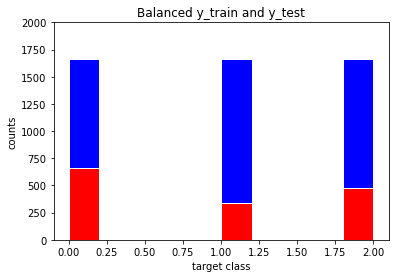

In [21]:
warnings.filterwarnings('ignore')

# Define a function that decides which strategy to use (over- or undersampling) [7]
def sampling_strategy(y,n_samples, t='majority'):
    target_classes = ''
    if t == 'majority':
        target_classes = pd.DataFrame(y).value_counts() > n_samples
    elif t == 'minority':
        target_classes = pd.DataFrame(y).value_counts() < n_samples
    tc = target_classes[target_classes].index
    sampling_strategy = {}
    for target in tc:
        sampling_strategy[target[0]] = n_samples
    return sampling_strategy

# Balancing the (numerical) training data
count_train = pd.DataFrame(y_train_num).value_counts()
n_train_samples = int(count_train.median())

under_sampler_train = ClusterCentroids(sampling_strategy=sampling_strategy(y_train_num,n_train_samples,t='majority'))
X_train_under, y_train_under = under_sampler_train.fit_resample(X_train_num, y_train_num)

over_sampler_train = SMOTE(sampling_strategy=sampling_strategy(y_train_under,n_train_samples, t='minority'),k_neighbors=2)
X_train_bal, y_train_bal = over_sampler_train.fit_resample(X_train_under, y_train_under)




# Plot new balanced training and test data
plt.figure()
plt.hist(y_train_bal,color='b', edgecolor = "white",label="y_train")
plt.hist(y_test_num,color='r', edgecolor = "white",label="y_test")
plt.xlabel('target class')
plt.ylabel("counts")
plt.ylim(0,2000)
plt.title('Balanced y_train and y_test')

#### Using a Voting or Stacking classifier to combine the best classifiers from Part A, B and/or C

In [22]:
# Define all the models for the Voting and Stacking classifiers to combine
# I chose not to include the support vector machine algorithms because they increased the computation time too much.
best_parameters = {'min_df': 0.01, 'ngram': (1, 1), 'C': 10}

# Model 1 - Gradient Boosting classifier ('gb', model1):
model1 = GradientBoostingClassifier(n_estimators=grid_search_GB.best_params_['n_estimators'])

# Model 2 - Random Forest Classifier ('rf', model2):
model2 = RandomForestClassifier(n_estimators=grid_search_RF_num.best_params_['n_estimators'])

# Model 3 - Decision Tree Classifier ('dt', model3):
model3 = DecisionTreeClassifier(random_state=0)

# Model 4 - Logistic Regression ('lr', model4):
model4 = LogisticRegression(C=grid_search.best_params_['C'])

# Model 5 - Gaussian Naive Bayes Classifier ('nb', model5):
model5 = GaussianNB()

# Model 6 - AdaBoost Classifier ('ada', model6):
model6 = AdaBoostClassifier(random_state=0,n_estimators=5)

# Model 7 - K-Nearest Neighbours Classifier ('knn', model7):
model7 = KNeighborsClassifier(n_neighbors=grid_search_KNN.best_params_['n_neighbors'])

# Make a list of all the estimators for the voting classifier:
estimators = [('gb', model1), ('rf', model2), ('nb', model5)]


In [24]:
# Choose the classifiers and set the weights
clfs=[model1,model2, model5]
weights=[]
for i in range(len(clfs)):
    weights.append('1')
    
# Train an Ensemble Vote Classifier on the unbalanced training data
eclf_unbal = EnsembleVoteClassifier(clfs=clfs, weights=weights)
eclf_unbal.fit(X_train_num,y_train_num)
pred_test = eclf_unbal.predict(X_test_num)

# Print the results
print("Unbalanced:")
print(f"accuracy score test: {eclf_unbal.score(X_test_num,y_test_num)}")
print(f"f1-score test: {f1_score(y_test_num, pred_test,average='micro'):.3}")

# Train an Ensemble Vote Classifier on the balanced training data
eclf_bal = EnsembleVoteClassifier(clfs=clfs, weights=weights)
eclf_bal.fit(X_train_bal,y_train_bal)
pred_test = eclf_bal.predict(X_test_num)

# Print the results
print("\nBalanced:")
print(f"accuracy score test: {eclf_bal.score(X_test_num,y_test_num)}")
print(f"f1-score test: {f1_score(y_test_num, pred_test,average='micro'):.3}")

Unbalanced:
accuracy score test: 0.7014218009478673
f1-score test: 0.701

Balanced:
accuracy score test: 0.6953283683141503
f1-score test: 0.695


In [26]:
# Train a Voting Classifier on the unbalanced training data
voter_unbal = VotingClassifier(estimators=estimators, voting='hard')
voter_unbal.fit(X_train_num,y_train_num)
pred_test = voter_unbal.predict(X_test_num)

# Print the results
print("Unbalanced:")
print(f"accuracy score test: {voter_unbal.score(X_test_num,y_test_num)}")
print(f"f1-score test: {f1_score(y_test_num, pred_test,average='micro'):.3}")

# Train a Voting Classifier on the balanced training data
voter_bal = VotingClassifier(estimators=estimators, voting='hard')
voter_bal.fit(X_train_bal,y_train_bal)
pred_test = voter_bal.predict(X_test_num)

# Print the results
print("\nBalanced:")
print(f"accuracy score test: {voter_bal.score(X_test_num,y_test_num)}")
print(f"f1-score test: {f1_score(y_test_num, pred_test,average='micro'):.3}")

Unbalanced:
accuracy score test: 0.7095463777928233
f1-score test: 0.71

Balanced:
accuracy score test: 0.6905890318212593
f1-score test: 0.691


In [27]:
# Train a Stacking Classifier on the unbalanced training data
sclf_unbal = StackingClassifier(estimators=estimators[:(len(estimators)-1)], final_estimator = estimators[-1][1])
sclf_unbal.fit(X_train_num, y_train_num)
pred_test = sclf_unbal.predict(X_test_num)

# Print the results
print("Unbalanced:")
print(f"accuracy score test: {sclf_unbal.score(X_test_num,y_test_num)}")
print(f"f1-score test: {f1_score(y_test_num, pred_test,average='micro'):.3}")

# Train a Stacking Classifier on the balanced training data
sclf_bal = StackingClassifier(estimators=estimators[:(len(estimators)-1)], final_estimator=estimators[-1][1])
sclf_bal.fit(X_train_bal, y_train_bal)
pred_test = sclf_bal.predict(X_test_num)

# Print the results
print("\nBalanced:")
print(f"accuracy score test: {sclf_bal.score(X_test_num,y_test_num)}")
print(f"f1-score test: {f1_score(y_test_num, pred_test,average='micro'):.3}")

Unbalanced:
accuracy score test: 0.6946513202437373
f1-score test: 0.695

Balanced:
accuracy score test: 0.6905890318212593
f1-score test: 0.691


In [21]:
# Manually add all the results (with f1-score > 0.710) from the voting and stacking classifiers
datalist.append(["Voting Classifier (Gradient Boosting - Random Forest)", "Balanced Numerical data", f"GB: {grid_search_GB.best_params_} - RF: {grid_search_RF_num.best_params_}", 0.715, 0.715])
datalist.append(["Voting Classifier (Gradient Boosting - Random Forest - Logistic Regression - Naive Bayes)", "Balanced Numerical data", f"LR: {grid_search.best_params_} - GB: {grid_search_GB.best_params_} - RF: {grid_search_RF_num.best_params_}", 0.716, 0.716])
datalist.append(["Voting Classifier (Gradient Boosting - Random Forest - Naive Bayes)", "Balanced Numerical data",f"GB: {grid_search_GB.best_params_} - RF: {grid_search_RF_num.best_params_}", 0.730, 0.730])
datalist.append(["Stacking Classifier (Gradient Boosting - Random Forest - Logistic Regression)", "Balanced Numerical data",f"GB: {grid_search_GB.best_params_} - RF: {grid_search_RF_num.best_params_}", 0.716, 0.716])
datalist.append(["Stacking Classifier (Gradient Boosting - Random Forest - Decision Tree - Logistic Regression - Naive Bayes - Logistic Regression)", "Balanced Numerical data", f"LR: {grid_search.best_params_} - GB: {grid_search_GB.best_params_} - RF: {grid_search_RF_num.best_params_}", 0.721, 0.722])
datalist.append(["Stacking Classifier (Gradient Boosting - Random Forest - Decision Tree - Logistic Regression - Naive Bayes - AdaBoost - Logistic Regression)", "Balanced Numerical data", f"LR: {grid_search.best_params_} - GB: {grid_search_GB.best_params_} - RF: {grid_search_RF_num.best_params_}", 0.726, 0.726])
datalist.append(["Stacking Classifier (Gradient Boosting - Random Forest - Naive Bayes - Logistic Regression)", "Balanced Numerical data",f"GB: {grid_search_GB.best_params_} - RF: {grid_search_RF_num.best_params_}", 0.717, 0.717])
datalist.append(["Stacking Classifier (Gradient Boosting - Random Forest - Decision Tree - Logistic Regression - Naive Bayes - AdaBoost - K-Nearest Neigbors - Logistic Regression)", "Balanced Numerical data", f"LR: {grid_search.best_params_} - KNN: {grid_search_KNN.best_params_} - GB: {grid_search_GB.best_params_} - RF: {grid_search_RF_num.best_params_}", 0.712, 0.712])

### Text data

#### Combine 'lyrics' and 'track_name' columns of text data

In [22]:
# Load the training data and assign the 'lyrics' and 'track_name' columns to X_train_text
train_data = pd.read_csv("spotify_songs_train2.csv")
X_train_text = pd.DataFrame(train_data[["lyrics","track_name"]].values.astype("str"))
X_train_text.rename(columns = {0:'lyrics', 1:'track_name'}, inplace = True)
y_train_text = train_data["label"]

# For each song, combine these two columns into the format "track_name - lyrics"
collist=[]
for i in range(len(X_train_text['lyrics'])):
    collist.append(f"{X_train_text['track_name'][i]} - {X_train_text['lyrics'][i]}")
X_train_text['lyrics+track_name'] = collist
X_train_text = X_train_text.drop(columns=['lyrics','track_name'],axis=1)

# Load the test data and assign the 'lyrics' and 'track_name' columns to X_test_text
test_data = pd.read_csv("spotify_songs_test2.csv")
X_test_text = pd.DataFrame(test_data[["lyrics","track_name"]].values.astype("str"))
X_test_text.rename(columns = {0:'lyrics', 1:'track_name'}, inplace = True)
y_test_text = test_data["label"]

# For each song, combine these two columns into the format "track_name - lyrics"
collist=[]
for i in range(len(X_test_text['lyrics'])):
    collist.append(f"{X_test_text['track_name'][i]} - {X_test_text['lyrics'][i]}")
X_test_text['lyrics+track_name'] = collist
X_test_text = X_test_text.drop(columns=['lyrics','track_name'],axis=1)

#### Try different hyperparameters

In [23]:
# Try different values for the ngram_range and min_df hyperparameters, and keep track of the best score
ngramlist = [(1,1),(1,2),(1,3),(2,2),(2,3),(3,3)]
min_dflist = [0.001,0.005,0.01,0.025,0.05]
best_score=0
for ngram_range in ngramlist:
    for min_df in min_dflist:
        tfidfvectorizer_sw = TfidfVectorizer(stop_words='english', min_df=min_df, ngram_range=ngram_range)
        X_train_tfidf_sw = tfidfvectorizer_sw.fit_transform(X_train_text['lyrics+track_name'])
        X_test_tfidf_sw = tfidfvectorizer_sw.transform(X_test_text['lyrics+track_name'])
        model = RandomForestClassifier(n_estimators=grid_search_RF_text.best_params_["n_estimators"])
        model.fit(X_train_tfidf_sw, y_train_text)
        score = model.score(X_test_tfidf_sw,y_test_text)
        if score > best_score:
            best_score=score
            best_parameters = {'min_df':min_df,'ngram_range':ngram_range,'n_estimators':grid_search_RF_text.best_params_["n_estimators"]}

print(best_parameters, best_score)

{'min_df': 0.001, 'ngram_range': (1, 3), 'n_estimators': 150} 0.5964793500338524


#### Retrain the model using the best hyperparameters found previously

In [24]:
# Random Forest
# Transform and rescale the data using the best hyperparameters
tfidfvectorizer = TfidfVectorizer(stop_words='english', min_df=best_parameters['min_df'], ngram_range=best_parameters['ngram_range'])
X_train_tfidf = tfidfvectorizer.fit_transform(X_train_text['lyrics+track_name'])
X_test_tfidf = tfidfvectorizer.transform(X_test_text['lyrics+track_name'])

# Retrain the model using the best hyperparameters
print(f"Random Forest - Best performing number of estimators: {grid_search_RF_text.best_params_['n_estimators']}")
RF = RandomForestClassifier(n_estimators=best_parameters['n_estimators'])
RF.fit(X_train_tfidf,y_train_text)

# Evaluation metrics
evaluation_metrics(RF, "Combined Text data",grid_search_RF_text.best_params_, X_train_tfidf, y_train_text, X_test_tfidf, y_test_text)


Random Forest - Best performing number of estimators: 150
Training set accuracy: 1.0
Test set accuracy: 0.594

Training set weighted F1-score: 1.0
Test set weighted F1-score: 0.594

Training set confusion matrix:
[[1765    0    0]
 [   0 1302    0]
 [   0    0 1665]]
Test set confusion matrix:
[[474  49 140]
 [145 129  62]
 [176  28 274]]


## Part D - Summary table and good coding standards

1. (2 points) Please include a summary table of all your results in a csv file. The table should include the algorithm used, the data used, the hyperparameter, accuracy and weighted f1 score. You can create this table automatically or manually.

In [25]:
# Create a pandas dataframe with the classifier, data, hyperparameters, weighted F1-score, and accuracy score
df = pd.DataFrame(datalist, columns=['Classifier', 'Data', 'Hyperparameters', 'Weighted F1-score', 'Accuracy score']).sort_values(by=['Weighted F1-score']) # [3]
display(df)

# Turn the summary table into a csv file 
df.to_csv("F1-score dataframe.csv")

,Classifier,Data,Hyperparameters,Weighted F1-score,Accuracy score
0,DummyClassifier(strategy='uniform'),Numerical data,N/A,0.347,0.322
1,LogisticRegression(C=0.01),Numerical data,{'C': 0.01},0.453,0.453
3,KNeighborsClassifier(n_neighbors=100),Numerical data,{'n_neighbors': 100},0.495,0.495
4,SVC(C=50),Numerical data,{'C': 50},0.512,0.512
7,"(DecisionTreeClassifier(max_features='sqrt', r...",Text data,{'n_estimators': 150},0.565,0.565
16,"(DecisionTreeClassifier(max_features='sqrt', r...",Combined Text data,{'n_estimators': 150},0.594,0.594
2,LogisticRegression(C=0.01),Scaled numerical data,{'C': 0.01},0.647,0.647
6,([DecisionTreeRegressor(criterion='friedman_ms...,Numerical data,{'n_estimators': 125},0.701,0.701
5,"(DecisionTreeClassifier(max_features='sqrt', r...",Numerical data,{'n_estimators': 175},0.708,0.708
15,Stacking Classifier (Gradient Boosting - Rando...,Balanced Numerical data,LR: {'C': 0.01} - KNN: {'n_neighbors': 100} - ...,0.712,0.712


2. (3 points) A maximum of 3 point will be awarded for well organized code that executes without errors.

## Part E - Bonus Points and Prizes for best performing solutions

We will offer bonus points (maximum of 2 points) based on your maximum weighted F1-score. You will only qualify for this bonus if you submit your assignment on time and fill out the form on Canvas indicating your best performing solution and weighted F1 score. Token prizes with be presented to students with the top 10 highest F1-score on the test set. Students with the top 3 highest F1-score on the test set will receive commemorative certificates and bragging rights.

## References

[1] Nakhaee, M. (2020). Audio features and lyrics of Spotify songs. Kaggle. https://www.kaggle.com/datasets/imuhammad/au features-and-lyrics-of-spotify-songs/

[2] NumPy user guide — NumPy v1.24 Manual. (n.d.). https://numpy.org/doc/stable/user/index.html#user

[3] User Guide — pandas 2.0.1 documentation. (n.d.). https://pandas.pydata.org/docs/user_guide/index.html

[4] User guide and tutorial — seaborn 0.12.2 documentation. (n.d.). https://seaborn.pydata.org/tutorial.html

[5] UnicodeDecodeError: “utf8” codec can’t decode byte 0xa5 in position 0: invalid start byte. (n.d.). Stack Overflow. https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s

[6] How to Get Columns of Numeric Datatype from DataFrame? - Python Examples. (n.d.). https://pythonexamples.org/pandas-dataframe-select-columns-of-numeric-datatype/

[7] Lo Duca, A. (2022, January 6). How to Deal with Imbalanced Multiclass Datasets in Python. Medium. https://towardsdatascience.com/how-to-deal-with-imbalanced-multiclass-datasets-in-python-fe0bb3f2b669